In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Linearização

Vamos criar uma variável X, independente, e uma variável Y, dependente de X.

In [2]:
# definindo x
x = np.linspace(2, 10 , 50)
# definido y como função exponencial de x
y = 2*np.exp(x)

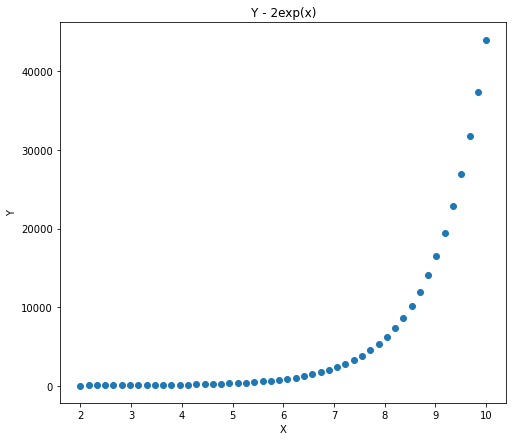

In [3]:
plt.figure(figsize = (8,7))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y - 2exp(x)')
plt.show()

O que podemos fazer para linearizar??

Podemos definir X como a exponencial de Si mesmo. Dessa forma, teremos 2 expressões exponenciais relacionadas.

In [4]:
# definindo x com a exponencial de x
x_exp = np.exp(x)

Vamos observar o efeito da transformação. Vamos ver o Antes e o Depois,

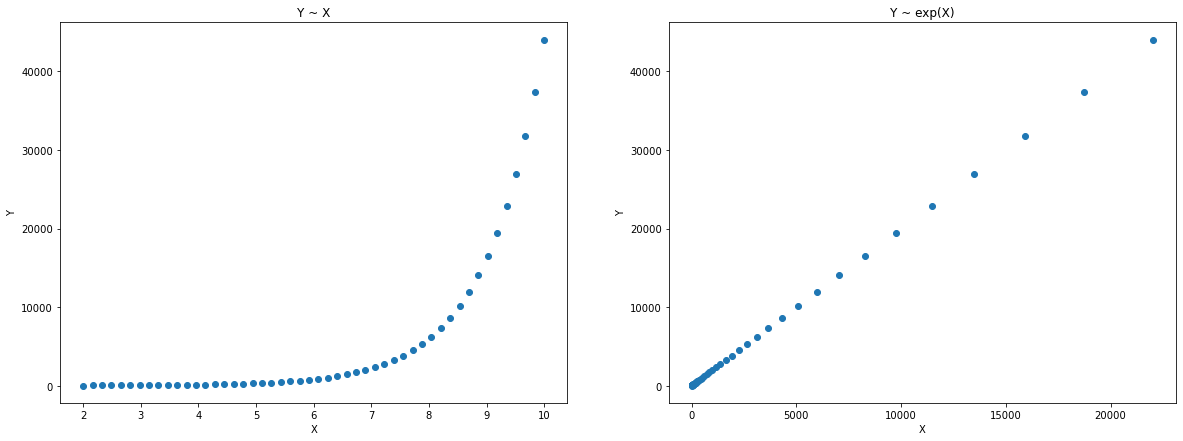

In [5]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].scatter(x,y)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Y ~ X')
ax[1].scatter(x_exp,y)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Y ~ exp(X)')
plt.show()

Note que agora temos duas variáveis linearmente dependentes. Agora podemos ajustar um modelo linear.

Poderíamos ter feito y como logarítmo natural de si mesmo!

In [6]:
# Log natural de Y
y_log = np.log(y)

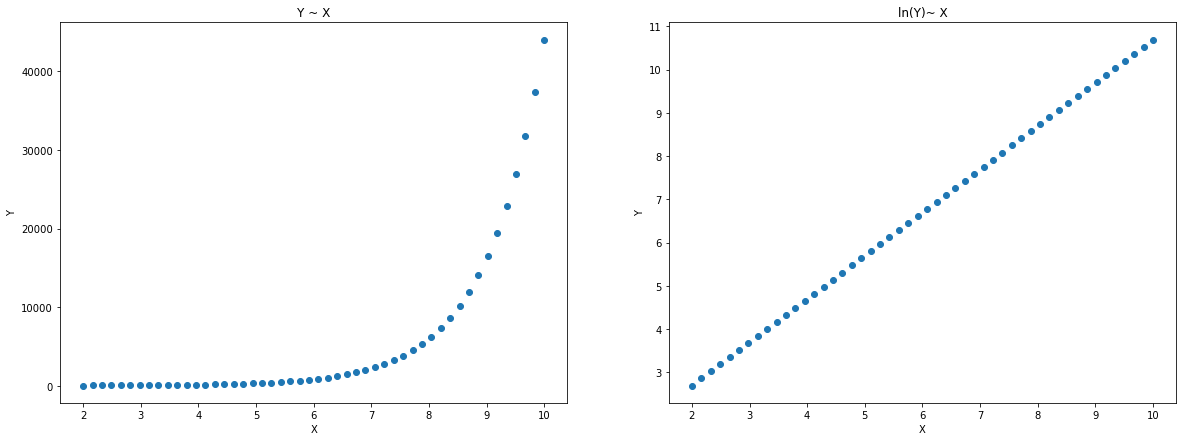

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].scatter(x,y)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Y ~ X')
ax[1].scatter(x,y_log)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('ln(Y)~ X')
plt.show()

# Regressão Linear Múltipla

In [8]:
df_reservatorio = pd.read_csv('clorofila.csv')

In [9]:
x = df_reservatorio.drop(columns=['Clorofila'])

In [10]:
y = df_reservatorio['Clorofila']

In [11]:
x = sm.add_constant(x)

In [12]:
model_linear_multiple = sm.OLS(y,x)
model_linear_multiple = model_linear_multiple.fit()

In [13]:
print(model_linear_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:              Clorofila   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     75.55
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.75e-74
Time:                        22:23:06   Log-Likelihood:                -1914.5
No. Observations:                 512   AIC:                             3845.
Df Residuals:                     504   BIC:                             3879.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -46.1466      7.801     -5.916

# Teste de Normalidade

## QQ Plot

O QQ plot plota os quantis teóricos de uma distribuição específica versus os quantis observados para a distribuição dos dados.

A ideia é que se as distribuições forem iguais, os quantis irão ser correspondentes e, portanto, estarão sobre uma reta y = x. Caso as distribuição sejam relacionadas linearmente, a incliniação da reta ou a posição da reta pode mudar, mas ainad assim, os quantis estarão sobre a reta.

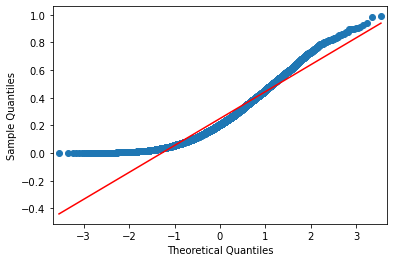

In [14]:
# QQ plot de uma distribuição não normal
non_normal_data = np.random.beta(1, 3, 5000)

# q-q plot
qqplot(non_normal_data, line='s')
plt.show()

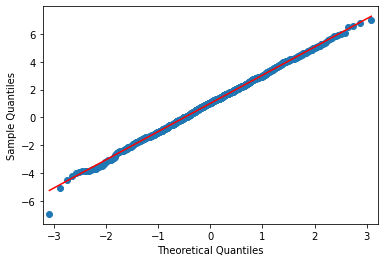

In [15]:
# QQ plot de uma distribuição normal de média 1 e desvio 2
normal_data= np.random.normal(loc=1, scale=2, size=1000)
# q-q plot
qqplot(normal_data, line='s')
plt.show()

## Teste de Shapiro Wilk

Primeiro criaremos uma função para testar.

Vamos aplicar a funçaõ na nossa distribuição normal gerada anteriormente.

In [24]:
def shapiro_test(data, alpha=0.05):
    stat, p = stats.shapiro(data)
    print('p-valor: p=%.3f' % (p))

    alpha = alpha
    if p > alpha:
        print('A amostra parece ser normalmente distribuiída Gaussian. Não rejeitamos H0')
    else:
        print('A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0')
    return stat, p

In [25]:
stat_normal, p_normal = shapiro_test(normal_data)

p-valor: p=0.740
A amostra parece ser normalmente distribuiída Gaussian. Não rejeitamos H0


Agora vamos testar para uma distribuição não normal

# Transformações 

## Box Cox 

Para realizar a transformação Box-Cox, vamos utilizar a biblioteca Scipy.

Inicialmente, vamos gerar uma distribuição sintética beta com 5000 elementos.

Vamos plotar o gráfico da distribuição!!

Agora iremos realizar a transformação Box Cox. Na prática, poderíamos aplicar diferentes lambdas de forma contínua e ir testando qual lambda fornece para nós uma transformação cuja distribuição se aproxima mais da normal. Contudo, isso não é necessário, pois o Scipy já realiza essa busca internamente e nos retorna os dados transformados e o valor de lambda correspondente.

A função nos retorna os dados e o número lambda

Agora vamos plotar o histograma dos nossos dados transformados!

Notou diferença?

É importante destacar que após realizar alguma previsão para essa variável, preciso aplicar a transformação inversa!

Será que os dados são recuperados perfeitamente??
